## Observations and Insights 

In [166]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = '.\Instructions\Pymaceuticals\data\Mouse_metadata.csv'
study_results_path = '.\Instructions\Pymaceuticals\data\Study_results.csv'
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path) 
# Combine the data into a single datase
merged_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')
# Display the data table for preview
print('\nRecords after merge:')
merged_df


Records after merge:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
# Checking the number of mice.
numMouse = merged_df['Mouse ID'].count()
numMouse

1893

In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupRows_df = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
dupRows_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [52]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dup_rows = merged_df[merged_df.duplicated(['Mouse ID'])]
all_dup_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_merged_df = merged_df.drop_duplicates('Mouse ID')
cleaned_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [18]:
# Checking the number of mice in the clean DataFrame.
print('Number of Mice after clean: ' + str(cleaned_merged_df['Mouse ID'].count()))

Number of Mice after clean: 249


## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdDev = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Std Dev': stdDev, 'SEM': sem})
summary_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

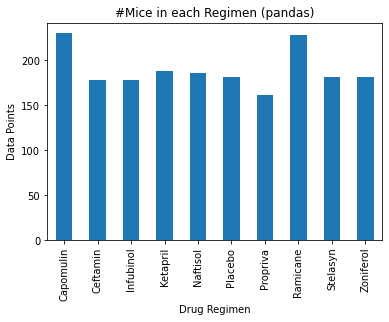

In [131]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_df = pd.DataFrame(merged_df.groupby(['Drug Regimen']).count()).reset_index()
drugs_df = drug_df[['Drug Regimen', 'Mouse ID']]
drugs_df = drugs_df.set_index('Drug Regimen')
drugs_df.plot(kind='bar', legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')
plt.title('#Mice in each Regimen (pandas)')
plt.show()

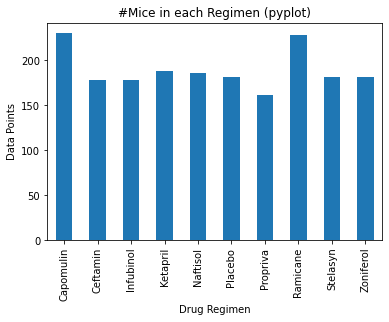

In [167]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug1_df = merged_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
drugs1_df = pd.DataFrame(drug1_df)
plt.xdata = drugs_df.plot.bar(legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')
plt.title('#Mice in each Regimen (pyplot)')
plt.show()

Text(0, 0.5, '')

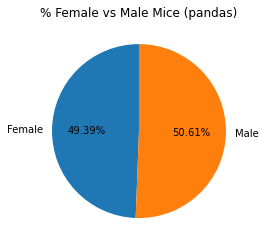

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(merged_df.groupby(["Sex"]).count()).reset_index()
gender_df=gender_df[['Sex','Mouse ID']]
plt.figure(figsize=(10,4))
axis = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = 'Mouse ID', ax=axis, autopct='%1.2f%%',
              startangle=90,labels=gender_df['Sex'], legend=False)
plt.title('% Female vs Male Mice (pandas)')
plt.ylabel('')
plt.show()

Text(0.5, 1.0, '% Female vs Male Mice (pyplot)')

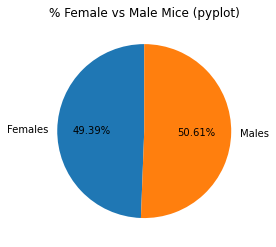

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genderCount = (merged_df.groupby(['Sex'])['Age_months'].count()).tolist()
labels = ['Female', 'Male']
plt.pie(genderCount, autopct='%1.2f%%', startangle=90, labels=labels)
plt.title('% Female vs Male Mice (pyplot)')
plt.show()

## Quartiles, Outliers and Boxplots

In [152]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Capomulin
cap_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin",:]
cap_max = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_max_df = pd.DataFrame(cap_max)
cap_max_merge = pd.merge(cap_max_df,merged_df,on=("Mouse ID","Timepoint"),how="left")
# Ramicane
ram_df = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane", :]
ram_max = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_max_df = pd.DataFrame(ram_max)
ram_max_merge = pd.merge(ram_max_df,merged_df,on=("Mouse ID","Timepoint"),how="left")
# Infubinol
inf_df = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol", :]
inf_max = inf_df.groupby('Mouse ID').max()['Timepoint']
inf_max_df = pd.DataFrame(inf_max)
inf_max_merge = pd.merge(inf_max_df,merged_df,on=("Mouse ID","Timepoint"),how="left")
# Ceftamin
cef_df = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin", :]
cef_max = cef_df.groupby('Mouse ID').max()['Timepoint']
cef_max_df = pd.DataFrame(cef_max)
cef_max_merge = pd.merge(cef_max_df,merged_df,on=("Mouse ID","Timepoint"),how="left")

In [153]:
# Capomulin
cap_tumors = cap_max_merge["Tumor Volume (mm3)"]
cap_quart = cap_tumors.quantile([.25,.5,.75])
cap_lowerq = cap_quart[0.25]
cap_upperq = cap_quart[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower = cap_lowerq - (1.5*cap_iqr)
cap_upper = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin outliers below {round(cap_lower,2)} and above {round(cap_upper,2)}")
# Ramicane
ram_tumors = ram_max_merge["Tumor Volume (mm3)"]
ram_quart = ram_tumors.quantile([.25,.5,.75])
ram_lowerq = ram_quart[0.25]
ram_upperq = ram_quart[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower = ram_lowerq - (1.5*ram_iqr)
ram_upper = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane outliers below {round(ram_lower,2)} and above {round(ram_upper,2)}")
# Infubinol
inf_tumors = inf_max_merge["Tumor Volume (mm3)"]
inf_quart = inf_tumors.quantile([.25,.5,.75])
inf_lowerq = inf_quart[0.25]
inf_upperq = inf_quart[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower = inf_lowerq - (1.5*inf_iqr)
inf_upper = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol outliers below {round(inf_lower,2)} and above {round(inf_upper,2)}")
# Ceftamin
cef_tumors = cef_max_merge["Tumor Volume (mm3)"]
cef_quart = cef_tumors.quantile([.25,.5,.75])
cef_lowerq = cef_quart[0.25]
cef_upperq = cef_quart[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower = cef_lowerq - (1.5*cef_iqr)
cef_upper = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamin outliers below {round(cef_lower,2)} and above {round(cef_upper,2)}")

Capomulin outliers below 20.7 and above 51.83
Ramicane outliers below 17.91 and above 54.31
Infubinol outliers below 36.83 and above 82.74
Ceftamin outliers below 25.36 and above 87.67


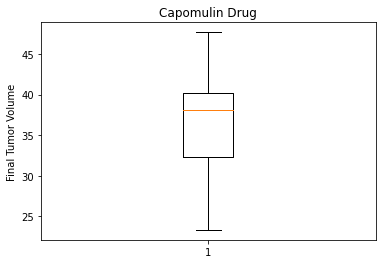

In [148]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Capomulin
cap_box, cap_axis = plt.subplots()
cap_axis.set_title('Capomulin Drug')
cap_axis.set_ylabel('Final Tumor Volume')
cap_axis.boxplot(cap_tumors)
plt.show()

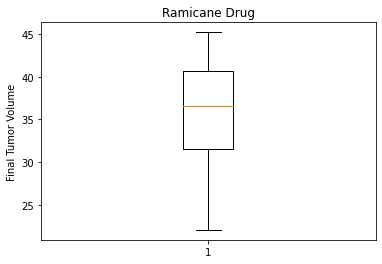

In [143]:
# Ramicane
ram_box, ram_axis = plt.subplots()
ram_axis.set_title('Ramicane Drug')
ram_axis.set_ylabel('Final Tumor Volume')
ram_axis.boxplot(ram_tumors)
plt.show()

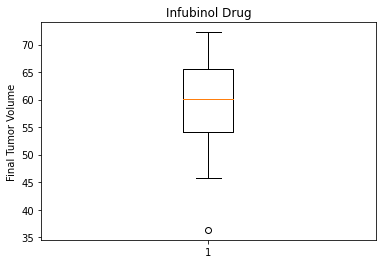

In [158]:
# Infubinol
inf_box, inf_axis = plt.subplots()
inf_axis.set_title('Infubinol Drug')
inf_axis.set_ylabel('Final Tumor Volume')
inf_axis.boxplot(inf_tumors)
plt.show()

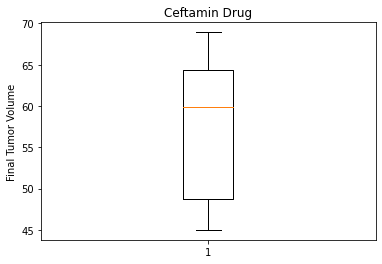

In [157]:
# Ceftamin
cef_box, cef_axis = plt.subplots()
cef_axis.set_title('Ceftamin Drug')
cef_axis.set_ylabel('Final Tumor Volume')
cef_axis.boxplot(cef_tumors)
plt.show()

## Line and Scatter Plots

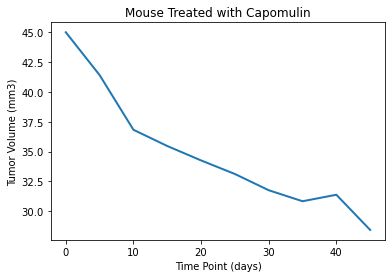

In [92]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cMouse_df = merged_df.loc[merged_df["Mouse ID"] == "m601"]
cMouse_df = cMouse_df.reset_index()
xAxis = cMouse_df["Timepoint"]
yAxis = cMouse_df["Tumor Volume (mm3)"]
plt.title('Mouse m601 Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(xAxis,yAxis,linewidth=2, markersize=15)
plt.show()

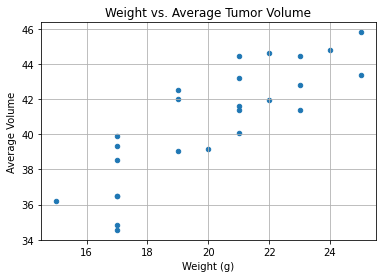

In [86]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
avg_capo = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capo = avg_capo.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_capo.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(6,4), title="Weight vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

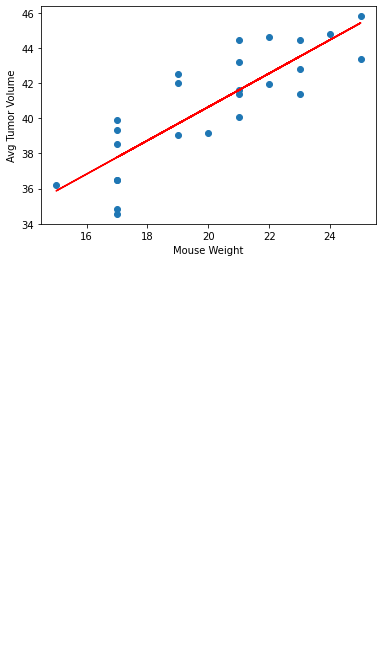

In [176]:
from scipy.stats import linregress
x_value = avg_capo['Weight (g)']
y_value = avg_capo['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value,regress_value,'r-')
plt.annotate(line_eq,(15,10),fontsize=15,color='red')
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume')
plt.show()